# Sales and Order Analysis  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 12

In [2]:
ecom_data_df = pd.read_parquet("../data/olist_ecom.parquet")

In [3]:
display(ecom_data_df.sample(1))
ecom_data_df.info()

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,time_to_approve,time_to_carrier,shipping_time,total_delivery_time,delivery_vs_estimate,Frequency,Monetary,Recency,R_score,F_score,M_score,RFM_score_string,RFM_score_composite,RFM_segment
6151,6151,bfea4a98ad57e429a31dab20bfe4375f,13fe2bd5cd6f09642f395ae04faa6b66,5665.0,sao paulo,SP,969791845aebad4fe9d49530189384b9,delivered,2018-02-12 16:51:09,2018-02-08 07:35:59,2018-02-14 21:57:32,2018-02-19 21:48:58,2018-02-22,1.0,boleto,1.0,819.32,3.0,07a6879526099e7f3483481e5bd60b77,8f2ce03f928b567e3d56181ae20ae952,2018-02-14 07:35:59,189.9,14.93,esporte_lazer,45.0,235.0,2.0,3000.0,60.0,15.0,15.0,-4.385532,6.598299,4.994051,7.206817,-2.090995,1,1638.64,209,3,1,5,315,9,Single Buyers (Moderate R & High M)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7475 entries, 0 to 7474
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   index                          7475 non-null   int64         
 1   customer_id                    7475 non-null   object        
 2   customer_unique_id             7475 non-null   object        
 3   customer_zip_code_prefix       6877 non-null   float64       
 4   customer_city                  7475 non-null   object        
 5   customer_state                 7475 non-null   object        
 6   order_id                       7475 non-null   object        
 7   order_status                   7475 non-null   object        
 8   order_purchase_timestamp       7475 non-null   datetime64[ns]
 9   order_approved_at              7475 non-null   datetime64[ns]
 10  order_delivered_carrier_date   7409 non-null   datetime64[ns]
 11  order_delivered_c

## Overall Sales Volume & Value
---
- what is the total order products?
- What is the total price and freight_value?
- What is the average order value (price + freight_value) per order?

In [4]:
total_order = ecom_data_df["order_id"].nunique()
total_revenue = ecom_data_df["price"].sum()
total_freight_value = ecom_data_df["freight_value"].sum()
avg_order = ecom_data_df.groupby("price")["freight_value"].sum().mean()
total_sales = total_revenue + total_freight_value

In [5]:
print(f"total order products: {total_order:,.0f}")
print(f"total revenue sales: R$ {total_revenue:,.2f}")
print(f"total freight price: R$ {total_freight_value:,.2f}")
print(f"average order product price: R$ {avg_order:,.2f}")
print(f"total sales (price + freight price): R$ {total_sales:,.2f}")

total order products: 6,817
total revenue sales: R$ 914,077.08
total freight price: R$ 145,420.97
average order product price: R$ 93.46
total sales (price + freight price): R$ 1,059,498.05


## Monthly sales Trend

In [6]:
ecom_data_df["order_period"] = ecom_data_df["order_purchase_timestamp"].dt.to_period(
    "M"
)
monthly_orders = (
    ecom_data_df.groupby("order_period")["order_id"].nunique().reset_index()
)
monthly_orders["order_period"] = monthly_orders["order_period"].astype(str)

In [48]:
print(monthly_orders.rename(columns={"order_id": "number_orders"}))

   order_period  number_orders
0       2016-10             27
1       2016-11              2
2       2017-01             59
3       2017-02            108
4       2017-03            176
5       2017-04            164
6       2017-05            252
7       2017-06            203
8       2017-07            271
9       2017-08            297
10      2017-09            302
11      2017-10            335
12      2017-11            477
13      2017-12            434
14      2018-01            477
15      2018-02            453
16      2018-03            458
17      2018-04            476
18      2018-05            515
19      2018-06            456
20      2018-07            455
21      2018-08            419
22      2018-09              1


Make plot

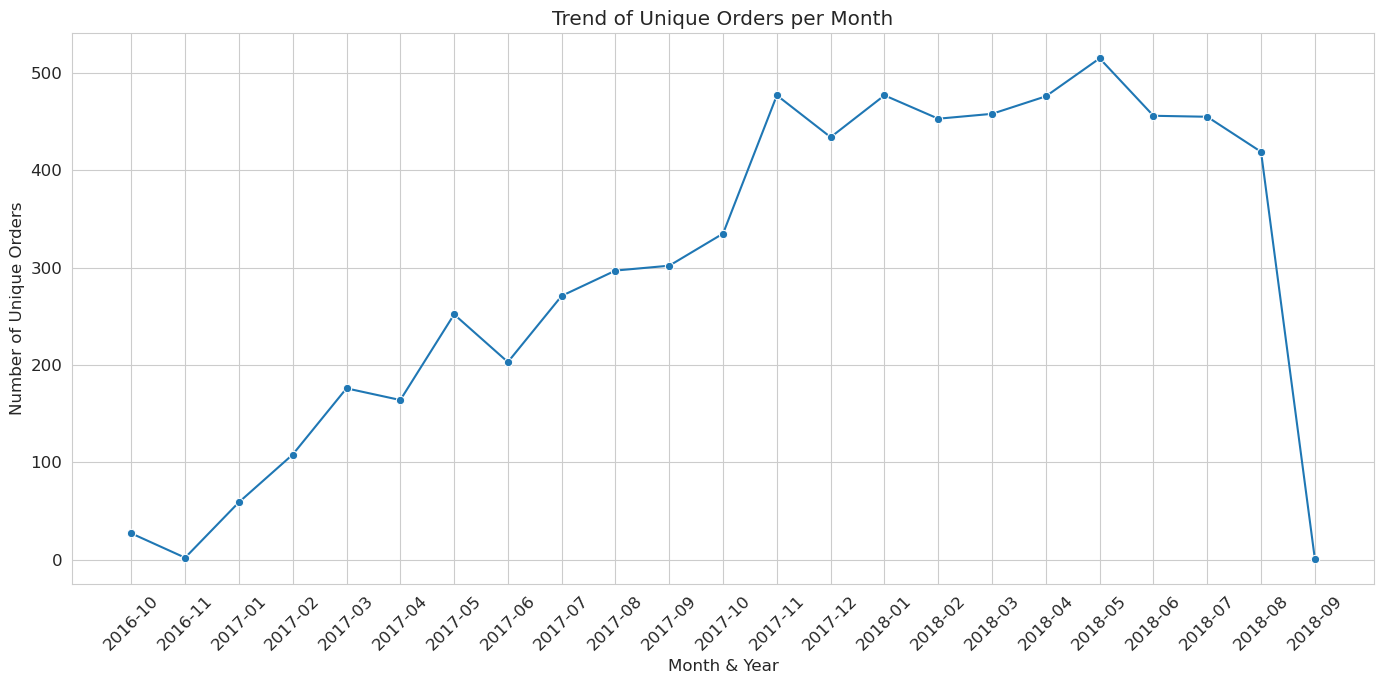

In [44]:
plt.figure(figsize=(14, 7))
sns.lineplot(x="order_period", y="order_id", data=monthly_orders, marker="o")
plt.title("Trend of Unique Orders per Month")
plt.xlabel("Month & Year")
plt.ylabel("Number of Unique Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Monthly sales Trend (total product price)

In [8]:
monthly_revenue = ecom_data_df.groupby("order_period")["price"].sum().reset_index()
monthly_revenue["order_period"] = monthly_revenue["order_period"].astype(str)

In [47]:
print(monthly_revenue)

   order_period     price
0       2016-10   4928.66
1       2016-11    105.90
2       2017-01   7484.09
3       2017-02  13226.43
4       2017-03  26971.02
5       2017-04  18700.57
6       2017-05  36381.80
7       2017-06  28933.87
8       2017-07  37152.81
9       2017-08  39209.35
10      2017-09  46062.20
11      2017-10  46958.21
12      2017-11  61840.87
13      2017-12  58839.61
14      2018-01  62482.83
15      2018-02  62789.37
16      2018-03  54381.99
17      2018-04  68358.78
18      2018-05  74076.15
19      2018-06  56254.43
20      2018-07  58150.47
21      2018-08  50757.68
22      2018-09     29.99


Make lineplot

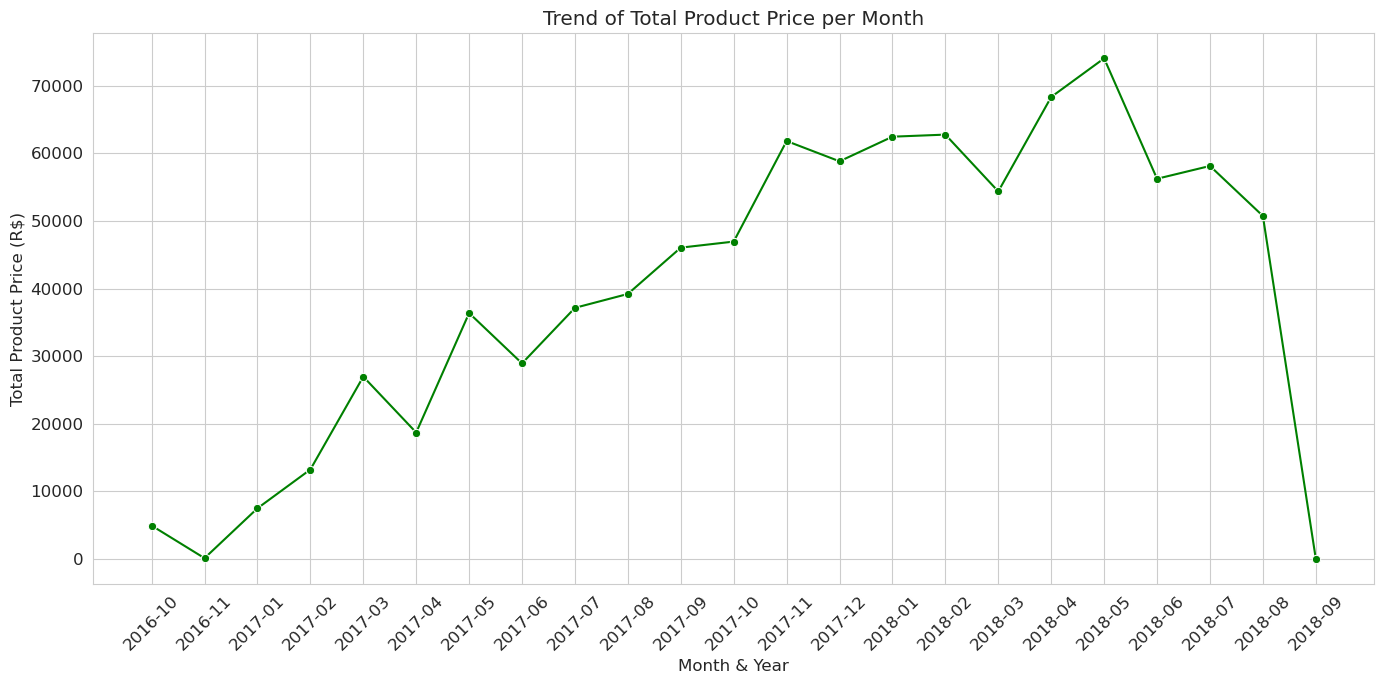

In [9]:
plt.figure(figsize=(14, 7))
sns.lineplot(
    x="order_period", y="price", data=monthly_revenue, marker="o", color="green"
)
plt.title("Trend of Total Product Price per Month")
plt.xlabel("Month & Year")
plt.ylabel("Total Product Price (R$)")
plt.xticks(rotation=45)
plt.ticklabel_format(style="plain", axis="y")
plt.tight_layout()
plt.show()

## Sales Trend by Day of the Week

In [ ]:
ecom_data_df["order_day"] = ecom_data_df["order_purchase_timestamp"].dt.day_name()
# Set explicit order for days of the week
day_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
ecom_data_df["order_day"] = pd.Categorical(
    ecom_data_df["order_day"], categories=day_order, ordered=True
)

daily_orders = ecom_data_df.groupby("order_day")["order_id"].nunique().reset_index()

/tmp/ipykernel_86526/3406402376.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_orders = ecom_data_df.groupby("order_day")["order_id"].nunique().reset_index()


In [49]:
print(daily_orders.rename(columns={"order_id": "number_orders"}))

   order_day  number_orders
0     Monday           1344
1    Tuesday           1218
2  Wednesday           1141
3   Thursday            180
4     Friday            135
5   Saturday           1393
6     Sunday           1406


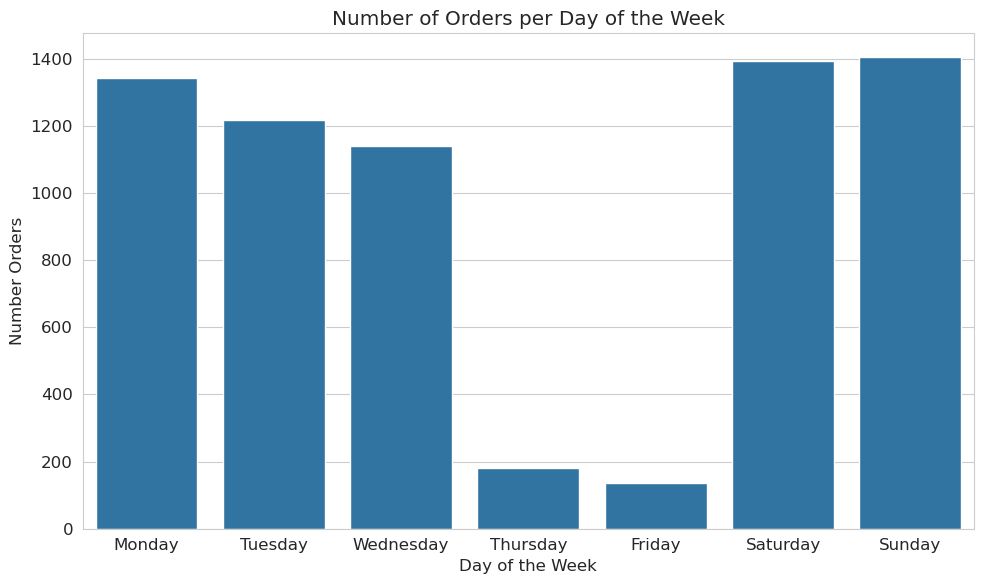

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x="order_day", y="order_id", data=daily_orders)
plt.title("Number of Orders per Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number Orders")
plt.tight_layout()
plt.show()

## Sales Trend by hour of Purchase the Product

In [ ]:
ecom_data_df["order_hour"] = ecom_data_df["order_purchase_timestamp"].dt.hour
hourly_orders = ecom_data_df.groupby("order_hour")["order_id"].nunique().reset_index()

In [51]:
print(hourly_orders.rename(columns={"order_id": "number_orders"}))

    order_hour  number_orders
0            0             41
1            1             66
2            2             80
3            3            144
4            4            131
5            5            216
6            6            268
7            7            354
8            8            575
9            9            701
10          10            551
11          11            392
12          12            386
13          13            488
14          14            462
15          15            455
16          16            375
17          17            349
18          18            266
19          19            180
20          20            133
21          21             87
22          22             67
23          23             50


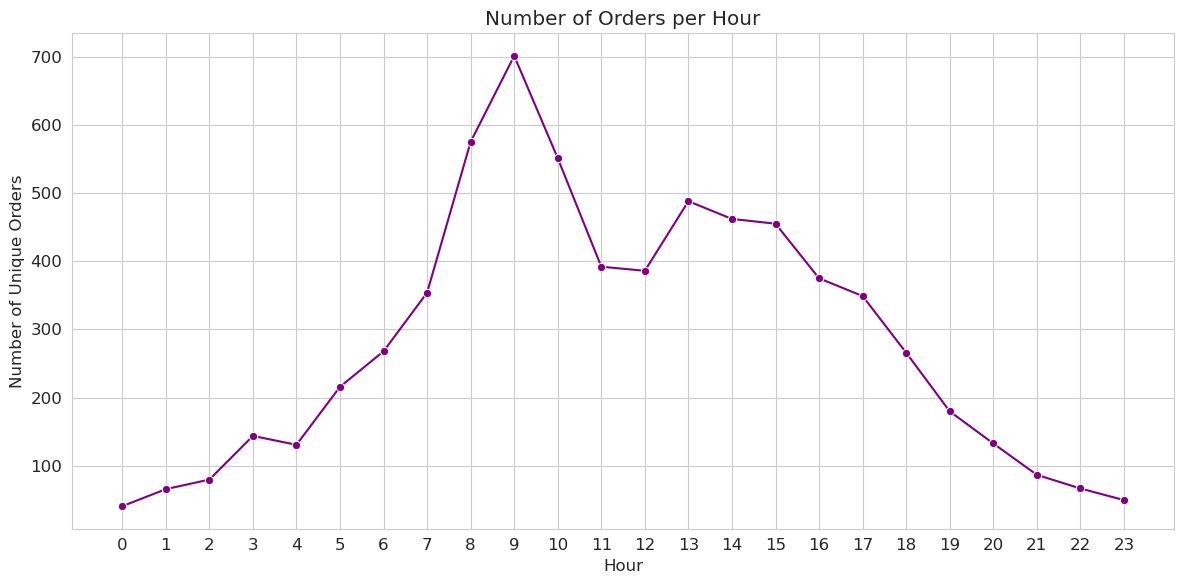

In [38]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    x="order_hour", y="order_id", data=hourly_orders, marker="o", color="purple"
)
plt.title("Number of Orders per Hour")
plt.xlabel("Hour")
plt.ylabel("Number of Unique Orders")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

## Distribution of Order Status

In [ ]:
order_status = ecom_data_df["order_status"].value_counts(normalize=True) * 100

In [62]:
print(order_status)

order_status
delivered     98.220736
shipped        0.842809
canceled       0.428094
processing     0.267559
invoiced       0.240803
Name: proportion, dtype: float64


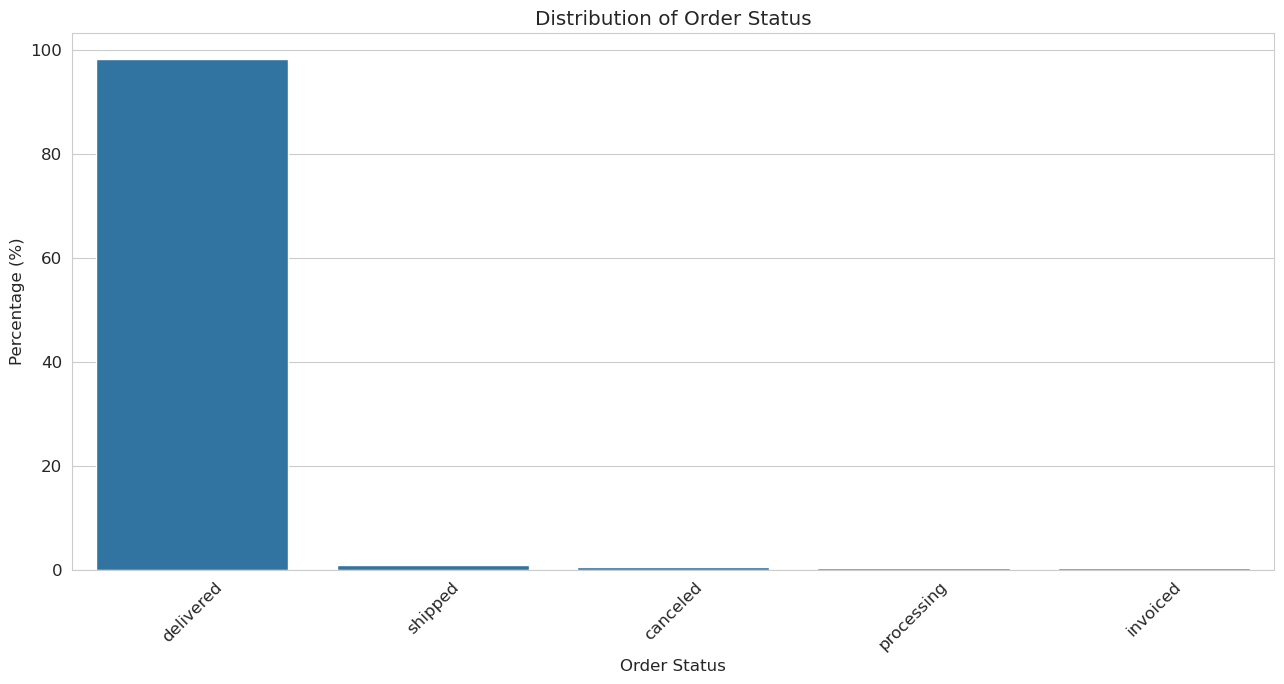

In [23]:
plt.figure(figsize=(13, 7))
sns.barplot(x=order_status.index, y=order_status.values)
plt.title("Distribution of Order Status")
plt.xlabel("Order Status")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Descriptive Statistic Numerical Columns

In [66]:
time_cols_for_analysis = [
    "time_to_approve",
    "time_to_carrier",
    "shipping_time",
    "total_delivery_time",
    "delivery_vs_estimate",
]

print("Descriptive Statistics for processing & delivery times (in days):")
ecom_data_df[time_cols_for_analysis].describe()

Descriptive Statistics for processing & delivery times (in days):


,time_to_approve,time_to_carrier,shipping_time,total_delivery_time,delivery_vs_estimate
count,7475.000000,7409.000000,7405.000000,7405.000000,6966.000000
mean,-0.586679,2.870067,9.214076,11.489083,-11.500280
std,3.256887,3.319170,8.546189,8.598062,10.243293
min,-62.357442,-9.341262,-11.980544,-11.021840,-74.158299
25%,-1.080521,0.959630,4.262025,6.491620,-16.409404
50%,0.044977,2.039225,7.098576,9.311343,-12.113848
75%,1.233038,3.418125,11.579884,13.939861,-6.996363
max,11.554028,64.570208,194.213009,196.425775,166.583380
